In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
ox.__version__

'1.7.0'

In [2]:
geopath = f"./Porto.graphml"
csvpath = f"./train_1500.csv"

In [3]:
def parse_gps_pos(elem_str: str):
    points = []
    # remove outer pair of brackets
    elem_str_trimmed = elem_str[2:-2]
    pt_strs = elem_str_trimmed.split(f"],[")
    for pt_str in pt_strs:
        # cur_trimmed = pt_str[1:-1]
        cur_lst = pt_str.split(f",")
        for idx in range(len(cur_lst)):
            cur_lst[idx] = float(cur_lst[idx])
        points.append(cur_lst)
    return points

df15 = pd.read_csv(csvpath).head(15)
G = ox.load_graphml(geopath)
gps_pos = df15["POLYLINE"]
gps_pos = gps_pos.apply(parse_gps_pos)

In [4]:
gps_pos[0]

[[-8.618643, 41.141412],
 [-8.618499, 41.141376],
 [-8.620326, 41.14251],
 [-8.622153, 41.143815],
 [-8.623953, 41.144373],
 [-8.62668, 41.144778],
 [-8.627373, 41.144697],
 [-8.630226, 41.14521],
 [-8.632746, 41.14692],
 [-8.631738, 41.148225],
 [-8.629938, 41.150385],
 [-8.62911, 41.151213],
 [-8.629128, 41.15124],
 [-8.628786, 41.152203],
 [-8.628687, 41.152374],
 [-8.628759, 41.152518],
 [-8.630838, 41.15268],
 [-8.632323, 41.153022],
 [-8.631144, 41.154489],
 [-8.630829, 41.154507],
 [-8.630829, 41.154516],
 [-8.630829, 41.154498],
 [-8.630838, 41.154489]]

In [5]:
gps_nodes = {}
for idx in range(len(gps_pos)):
    cur_gps_pos = gps_pos[idx]
    cur_long = []
    cur_lat = []
    for point in cur_gps_pos:
        cur_long.append(point[0])
        cur_lat.append(point[1])
    nearest_nodes = ox.distance.nearest_nodes(G, X=cur_long, Y=cur_lat)
    gps_nodes[idx] = nearest_nodes

In [6]:
gps_nodes[0]

[2915001116,
 2915001116,
 1788784923,
 475716312,
 122549700,
 111467467,
 111467467,
 478645996,
 111467271,
 1143316313,
 478863896,
 427067714,
 427067714,
 128673222,
 128673222,
 128673222,
 128673223,
 1418798472,
 129800102,
 129800097,
 129800097,
 129800097,
 129800097]

In [19]:
# # Create a new figure
# fig = plt.figure()

# # Create a set of axes (subplot) within the figure
# ax = fig.add_subplot(111)  # 111 means 1x1 grid, first subplot

[[-8.618868, 41.155101], [-8.6175, 41.154912], [-8.615079, 41.154525], [-8.613468, 41.154228], [-8.613261, 41.154102], [-8.613297, 41.153832], [-8.612037, 41.153904], [-8.611929, 41.155803], [-8.610876, 41.157171], [-8.610183, 41.157252], [-8.610138, 41.15727], [-8.609508, 41.157369], [-8.608707, 41.158395], [-8.607915, 41.160042], [-8.607654, 41.1606], [-8.606295, 41.164155], [-8.60643, 41.166693], [-8.60634, 41.169123], [-8.60445, 41.171112], [-8.60121, 41.171166], [-8.597205, 41.171625], [-8.593578, 41.170968], [-8.5905, 41.168979], [-8.587206, 41.167062], [-8.583624, 41.166252], [-8.58213, 41.1642], [-8.58114, 41.163381], [-8.579376, 41.164326], [-8.577468, 41.165316], [-8.576298, 41.163858], [-8.575101, 41.16231], [-8.575065, 41.162265]]


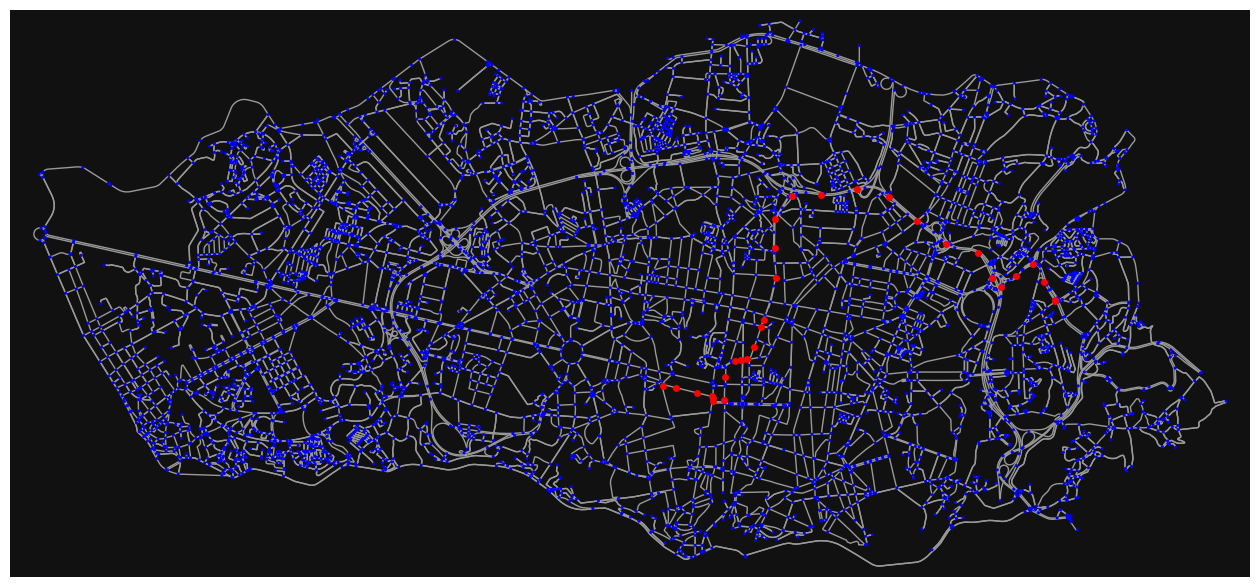

In [58]:
k = 12

cur_trace = gps_pos[k]
print(cur_trace)
fig, ax = ox.plot.plot_graph(G, node_size=5, 
                             bgcolor=f"#111111", 
                             node_color="b", 
                             figsize=(16,16),
                             show=False)
# fig, ax = ox.plot.plot_graph(ox.project_graph(G), node_size=5, )
for point in cur_trace:
    ax.plot(point[0], point[1], 'ro', markersize=4, zorder=2)
    # ax.plot(node_data['x'], node_data['y'], 'ro', markersize=4, zorder=4)
plt.show()

[25632285, 25632293, 1110698273, 5284368076, 5291538854, 129548927, 137992808, 137994720, 137992807, 126617431, 425725651, 1209790951, 4526688786, 5291598263, 3092764704, 26015889, 3501878316, 319327503, 1842003107, 25507552, 409114759, 404072485, 4685448853, 1731168913, 1548083598, 1548082208]


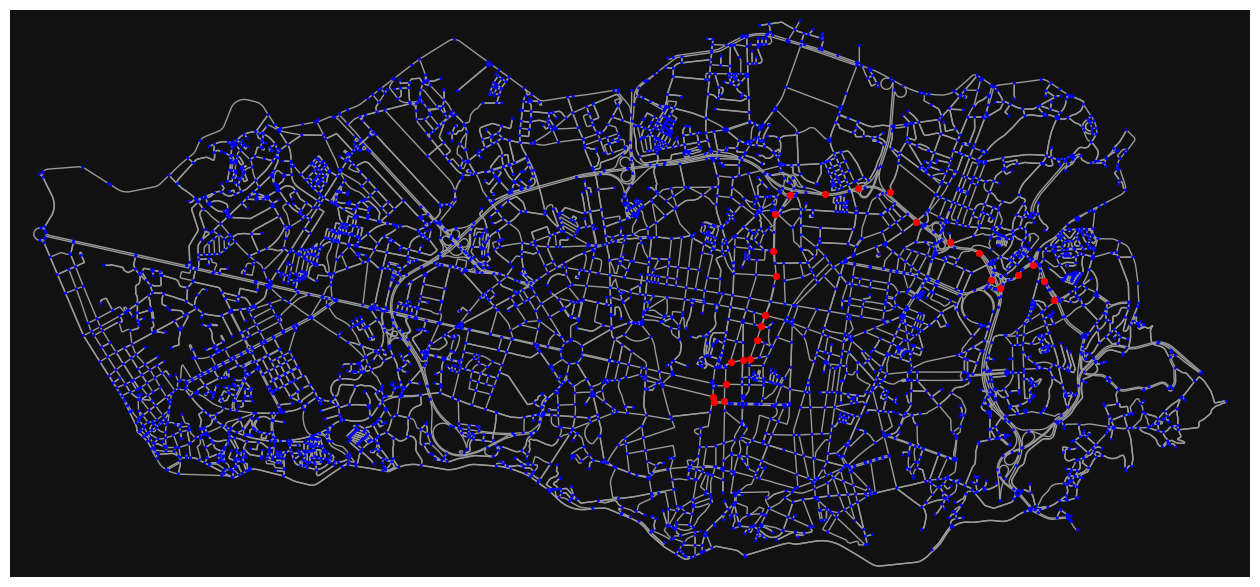

In [59]:
k = 12

# Create a map of the road network using OSMnx
cur_route_raw = gps_nodes[k]
cur_route = []
prev_id = cur_route_raw[0]
for idx in range(1, len(cur_route_raw)-1):
    if cur_route_raw[idx] != prev_id:
        cur_route.append(cur_route_raw[idx])
        prev_id = cur_route_raw[idx]
    else:
        pass
print(cur_route)

fig, ax = ox.plot.plot_graph(G, node_size=5, 
                             bgcolor=f"#111111", 
                             node_color="b", 
                             figsize=(16,16),
                             show=False)
# fig, ax = ox.plot.plot_graph(ox.project_graph(G), node_size=5, )
for node in cur_route:
    node_data = G.nodes[node]
    # print(node_data)
    ax.plot(node_data['x'], node_data['y'], 'ro', markersize=4, zorder=2)
    ax.plot(node_data['x'], node_data['y'], 'ro', markersize=4, zorder=4)
plt.show()

In [23]:
plt.show()

In [17]:
type(ax)

matplotlib.axes._axes.Axes

In [16]:
fig.show()

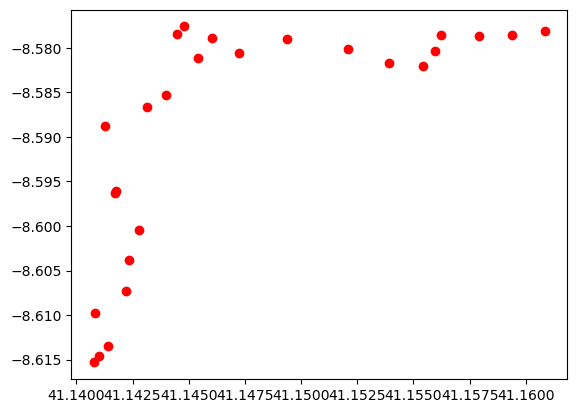

In [11]:

# Plot GPS positions on the map
for node in gps_nodes[k]:
    x, y = G.nodes[node]['x'], G.nodes[node]['y']
    plt.plot(y, x, 'ro')  # 'ro' for red circles as markers

plt.show()